# Q3: Even deeper! Resnet18 for PASCAL classification (15 pts)

Hopefully we all got much better accuracy with the deeper model! Since 2012, much deeper architectures have been proposed. [ResNet](https://arxiv.org/abs/1512.03385) is one of the popular ones. In this task, we attempt to further improve the performance with the “very deep” ResNet-18 architecture.


## 3.1 Build ResNet-18 (1 pts)
Write a network modules for the Resnet-18 architecture (refer to the original paper). You can use `torchvision.models` for this section, so it should be very easy! 
Do not load the pretrained weights for this question. We will get to that in the next question.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import matplotlib.pyplot as plt
%matplotlib inline

import trainer
from utils import ARGS
from simple_cnn import SimpleCNN
from voc_dataset import VOCDataset

torch.cuda.empty_cache()

# you could write the whole class....
# or one line :D
ResNet = models.resnet18(pretrained=False)

## 3.2 Add Tensorboard Summaries (6 pts)
You should've already written tensorboard summary generation code into `trainer.py` from q1. However, you probably just added the most basic summary features. Please implement the more advanced summaries listed here:
* training loss (should be done)
* testing MAP curves (should be done)
* learning rate
* [histogram of gradients](https://www.tensorflow.org/api_docs/python/tf/summary/histogram)

## 3.3 Train and Test (8 pts)
Use the same hyperparameter settings from Task 2, and train the model for 50 epochs. Tune hyperparameters properly to get mAP around 0.5. Report tensorboard screenshots for *all* of the summaries listed above (for image summaries show screenshots at $n \geq 3$ iterations). For the histograms, include the screenshots of the gradients of layer1.1.conv1.weight and layer4.0.bn2.bias.

**REMEMBER TO SAVE A MODEL AT THE END OF TRAINING**

In [2]:
args = ARGS(test_batch_size=32, epochs=50, batch_size=32, lr=0.0005, gamma=0.9, step_size=1.2, log_every = 250, val_every = 250, use_cuda = True)
model = ResNet
model.fc = nn.Linear(512,20)
optimizer = torch.optim.Adam(model.parameters(), lr=args.lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=args.step_size, gamma=args.gamma)
test_ap, test_map = trainer.train(args, model, optimizer, scheduler, 'ResNet_Pretrained_False')
print('test map:', test_map)

Train Epoch: 0 [0 (0%)]	Loss: 0.667691
Validation MAP =  0.07442209641479239
Train Epoch: 1 [250 (59%)]	Loss: 0.205553
Validation MAP =  0.15305589904706962
Train Epoch: 3 [500 (18%)]	Loss: 0.177031
Validation MAP =  0.20080231838450083
Train Epoch: 4 [750 (78%)]	Loss: 0.188523
Validation MAP =  0.20556769528901694
Train Epoch: 6 [1000 (37%)]	Loss: 0.172556
Validation MAP =  0.2524713617109454
Train Epoch: 7 [1250 (96%)]	Loss: 0.181654
Validation MAP =  0.24017172886912141
Train Epoch: 9 [1500 (55%)]	Loss: 0.190007
Validation MAP =  0.256922640039074
Train Epoch: 11 [1750 (15%)]	Loss: 0.185643
Validation MAP =  0.2823779624129167
Train Epoch: 12 [2000 (74%)]	Loss: 0.184555
Validation MAP =  0.3215102691645679
Train Epoch: 14 [2250 (33%)]	Loss: 0.144383
Validation MAP =  0.33957962359755306
Train Epoch: 15 [2500 (92%)]	Loss: 0.152534
Validation MAP =  0.3571367845721184
Train Epoch: 17 [2750 (52%)]	Loss: 0.159810
Validation MAP =  0.3797570562549479
Train Epoch: 19 [3000 (11%)]	Loss: 0.

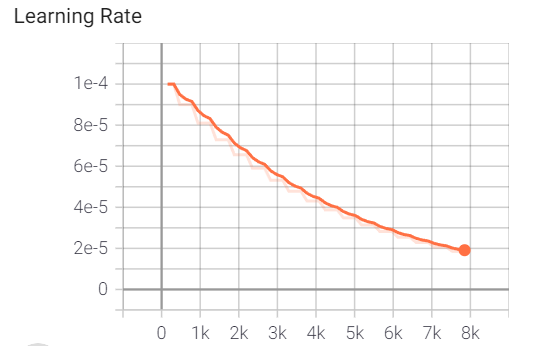

In [3]:
from IPython.display import Image
Image("./images/ResNet_False_LR.PNG")

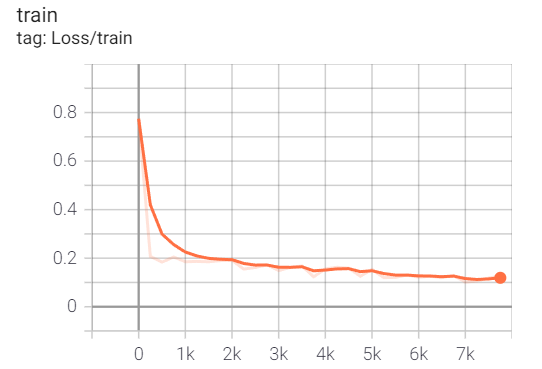

In [4]:
Image("./images/ResNet_False_train.PNG")

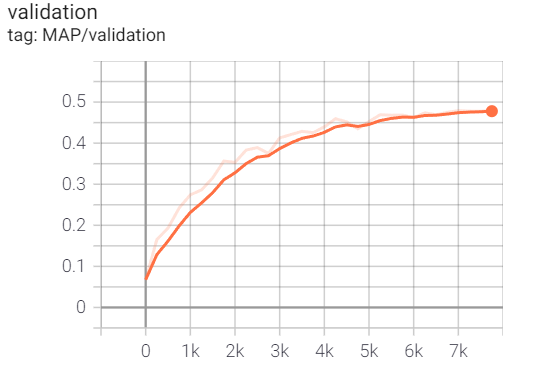

In [5]:
Image("./images/ResNet_False_validation.PNG")

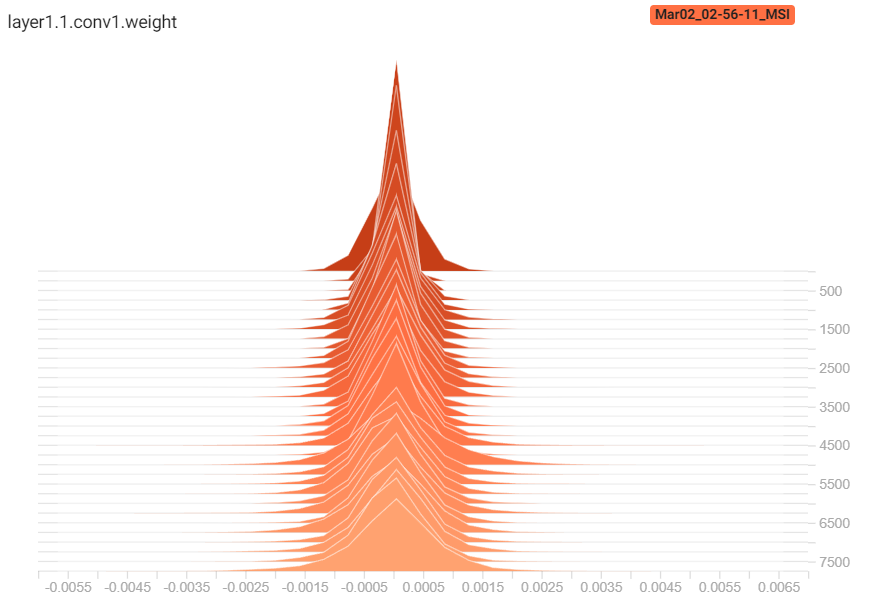

In [6]:
Image("./images/ResNet_False_layer1conv1wt.PNG")

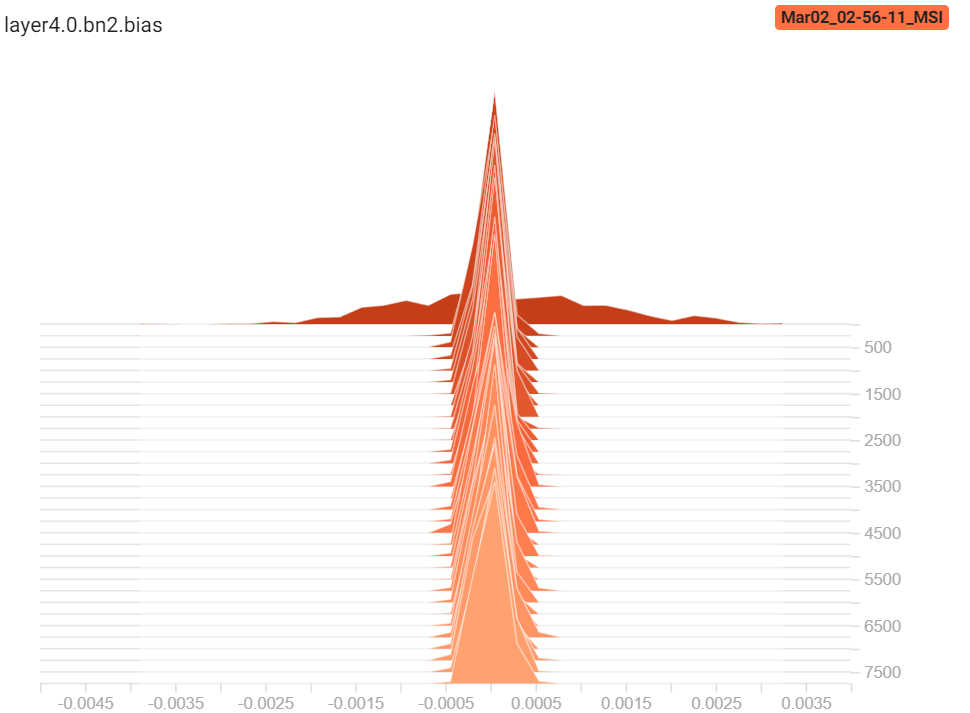

In [7]:
Image("./images/ResNet_False_layer4bn2bias.PNG")